# Paragraph to mem prototype
## Import modules

In [1]:
#import sys
#sys.path.append('/Users/michaellomnitz/Documents/CDIPS-AI/pensieve/pensieve')

import pensieve as pens
import textacy
from collections import defaultdict
from random import random
import numpy as np
import matplotlib.pyplot as plt

## Define some constant variables
* Chagne path to your books!
* _all_books_ : Path to the 7 seven books used to mine meomories
* _coolors & bins_ : Defining some hisotrgram constants
* _docs_ : List of pensieve.Doc's, one for each book


In [2]:
all_books = ['../../clusterpot/book1.txt']
#               '../../clusterpot/book2.txt',
#               '../../clusterpot/book3.txt',
#               '../../clusterpot/book4.txt',
#               '../../clusterpot/book5.txt',
#               '../../clusterpot/book6.txt',
#               '../../clusterpot/book7.txt']
#all_books = ['../../clusterpot/book1.txt']

colors = ['black', 'red', 'green', 'blue', 'cyan', 'yellow','magenta']
bins = [ 5*i for i in range(0,201) ]
docs = []
for book in all_books:
    docs.append(pens.Doc(book))

## Harry paragraphs
We define the harryness of a paragraph as the number of instances of 'Harry' and 'Harry'/sentence in a paragraph

In [3]:
def harry_paragraphs( d ):
    x = []
    y= []
    par = []
    par_weight = {}
    for i, p in enumerate(d.paragraphs):
        count = 1
        for sent in p.doc.sents:
            #print(sent.text)
            count+=1
        #lines.append(count)
    #print(sent)
        harryness = p.words['names']['Harry']
        harryness_per_sent = p.words['names']['Harry']/count #+ p.words['names']['Potter']
        #+ p.words['names']['Potter'] + p.words['names']['Harry Potter']
        if len(p.text) > 0:
            #print(harryness/len(p.text))
            if harryness >=1:
                x.append(harryness)
                y.append(harryness_per_sent)
            if harryness >= 3:
                par.append(i)
                par_weight[i] = harryness
    return x,y


## QA Histograms
We process the loaded pensieve docs. Some basic QA histograms are filled and we plot the # of instances of the different 'verbs' document wise. This will be used to select the significant verbs in each paragraph (appearance freq. < 50)

Reading  <pensieve.pensieve.Doc object at 0x1179d89e8>


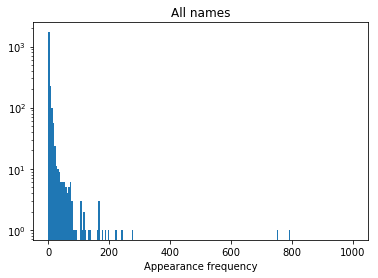

In [4]:
histogram = []
hist_per_sent = []
words_hist = []

for i, d in enumerate(docs):
    print('Reading ',d)
    h, h_per_line = harry_paragraphs(d)
    histogram.append(h)
    hist_per_sent.append(h_per_line)
    for verb in d.words['verbs']:
        words_hist.append(d.words['verbs'][verb])
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Appearance frequency')
ax.set_title('All names')
#
plt.hist(words_hist,bins)
plt.yscale('log')
#
plt.show()

### Next we plot frequency and frequency per sentence per paragraph

/Users/michaellomnitz/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


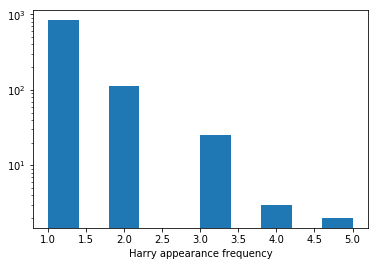

In [5]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.set_xlabel('Harry appearance frequency')
plt.hist(histogram)#, color=colors)
# for i, h in enumerate(histogram):
#     lab = "book"+str(i)
#     plt.hist(h,color = colors[i],label = lab)
plt.yscale('log')
ax.legend(bbox_to_anchor=(0, 0, 1, 1))
plt.show()   
#print(len(par))

/Users/michaellomnitz/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


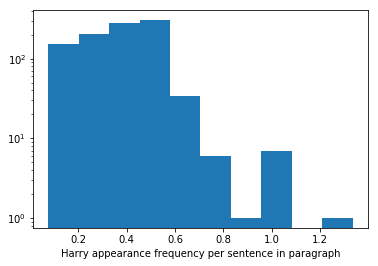

In [6]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.set_xlabel('Harry appearance frequency per sentence in paragraph')
# for i, h in enumerate(hist_per_sent):
#     lab = "book"+str(i)
#     plt.hist(h,color = colors[i],label = lab)
plt.hist(hist_per_sent)
plt.yscale('log')
ax.legend(bbox_to_anchor=(0, 0, 1, 1))
plt.show() 

## Generating memory text
With the previous information we can define meaningful paragraphs and sentences. We can iterate over paragraphs, selecting those with _nHarry's/sentence > 0.4_ and construct memories:
* Find _textacy_ main verbs and select meaningful verbs (_documenta wise freq. < 50_) and find their subjects and objects
* Get verb auxiliaries and check if there is necesary negation


In [11]:
max = 100
def para_2_mem(p,counter):
    main_verbs = textacy.spacy_utils.get_main_verbs_of_sent(p.doc)
    results = []
    for verb in main_verbs:
        my_string = ''
        if p.words['verbs'][verb.text] < 50:
            # --- Getting aux verbs 
            span = textacy.spacy_utils.get_span_for_verb_auxiliaries(verb)
            complex_verb = p.doc[span[0]].text
            span_end = 1
            if textacy.spacy_utils.is_negated_verb(verb) is True:
                complex_verb = complex_verb+' not '
                span_end = 0
            for a in range(span[0]+1,span[1]+span_end):
                complex_verb +=" "+p.doc[span[1]].text
            # --- 
            subjects = textacy.spacy_utils.get_subjects_of_verb(verb)
            objects = textacy.spacy_utils.get_objects_of_verb(verb)
            if len(subjects)>0 and len(objects)>0:
                results.append([subjects,complex_verb,objects])
                           
            
                #if counter < max:
                    #print(subjects,complex_verb,objects)
                
    #print(" ------------------------------- ")
    return results


Quick test on documents as proof of principal

In [14]:
# Will only print out the first processed paragraphs for QA

def doc2mem(docs):
    counter = 0
    passed = 0
    for p in docs.paragraphs:
        #
        count = 1
        for sent in p.doc.sents:
            count+=1
        #
        if p.words['names']['Harry']/count >= 0.9 : 
            #
            passed +=1 
            print(" Sentences ",counter," \n",p.text)
            print(" ------------------------------- ")
            log = ''
            for key in p.words['places']:
                log+=key+' '       
            #print("Places: ", log)
            #print(" ------------------------------- ")
            log = ''
            for key in p.words['names']:
                log+=key+' '
            print("People: ", log)
            print(" ------------------------------- ")
            print('Actions \n ')
            #
            log = para_2_mem(p,counter)

            for i_log in log:
                print(i_log)
                #print(log)
            counter+=1
            print(" ------------------------------- ")
    return passed
    

In [15]:
counter = 0
passed = 0
for d in docs:
    passed+=doc2mem(d)
#    print(len(d.paragraphs))
    #passed+=doc2mem(d)
    
print(passed)

 Sentences  0  
 “OUT!” roared Uncle Vernon, and he took both Harry and Dudley by the scruffs of their necks and threw them into the hall, slamming the kitchen door behind them. Harry and Dudley promptly had a furious but silent fight over who would listen at the keyhole; Dudley won, so Harry, his glasses dangling from one ear, lay flat on his stomach to listen at the crack between door and floor.
 ------------------------------- 
People:  Uncle Vernon Harry Dudley 
 ------------------------------- 
Actions 
 
[[”], 'roared', [Vernon]]
[[he], 'took', [Harry, Dudley]]
[[Harry, Dudley], 'had', [fight]]
[[glasses], 'lay', [flat]]
 ------------------------------- 
 Sentences  1  
 The late afternoon sun hung low in the sky as Harry and Hagrid made their way back down Diagon Alley, back through the wall, back through the Leaky Cauldron, now empty Harry didn’t speak at all as they walked down the road; he didn’t even notice how much people were gawking at them on the Underground, laden as th

## More data?
Scrape the internet for more on Harry Potter. There is a lot of fan finctions plus summaried information on the seires out there.

Import libraries and make call from wikia page using api

In [ ]:
import requests
import json

r = requests.get('http://harrypotter.wikia.com/api/v1/Articles/Top')
hp_id = [it['id'] for it in json.loads(r.content)['items'] if it['title'] == 'Harry Potter'][0]



In [ ]:
r = requests.get('http://harrypotter.wikia.com/api/v1/Articles/AsSimpleJson', params={'id': hp_id})
json.dump(r.text, open('HarryPotterWikia1.json', 'w'))

In [ ]:
cont = json.loads(r.text)
with open('HarryPotterWikia.txt', 'w') as f:
    for section in cont['sections']:
        #print(section['title'])
        #f.write(section['title'].encode('utf8')+'\n')
        f.write(section['title']+'\n')
        for unit in section['content']:
            if unit['type'] == 'paragraph':f.write(unit['text']+'\n')

text = pens.Doc('HarryPotterWikia.txt')

In [ ]:
doc2mem(text)

In [ ]:
for a in textacy.extract.named_entities(docs[0].paragraphs[10].doc, include_types=['PERSON'],min_freq = 2):
    
    print(a)